<a href="https://colab.research.google.com/github/amtayl25/1d3d/blob/main/3D1D_singlevessel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install required libraries (try-catch safe)
"""
NOTE: You can save the Docker image state after running this block so that you don't have to run it every time you start a new environment.
"""
import os, re

def replace_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Replace 'ufl' with 'ufl_legacy'
    content = re.sub(r'\bufl\b', 'ufl_legacy', content)

    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(content)

def process_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.py'):
                file_path = os.path.join(root, file)
                replace_in_file(file_path)

# ipywidgets
try:
    import ipywidgets
except ImportError:
    !pip install ipywidgets

# dolfin
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

# graphnics
try:
    import graphnics
except ImportError:
    !git clone "https://github.com/IngeborgGjerde/graphnics"
    !pip install graphnics/


# block
try:
    import block
except ImportError:
    !git clone "https://bitbucket.org/fenics-apps/cbc.block/src/master/"
    !pip install master/

# fenics_ii
try:
    import xii
except ImportError:
    !git clone "https://github.com/MiroK/fenics_ii"
    process_directory("fenics_ii/")
    !pip install fenics_ii/

# vtk
try:
    import vtk
except ImportError:
    !pip install vtk

# graphnics
try:
    import graphnics
except ImportError:
    !git clone "https://github.com/IngeborgGjerde/graphnics"
    !pip install graphnics/

# meshio
try:
    import meshio
except ImportError:
    !pip install meshio

# pyvista
try:
    import pyvista
except ImportError:
    !pip install pyvista

--2025-03-11 03:01:14--  https://fem-on-colab.github.io/releases/fenics-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.109.153, 185.199.110.153, 185.199.111.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4180 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.08K  --.-KB/s    in 0s      

2025-03-11 03:01:15 (35.8 MB/s) - ‘/tmp/fenics-install.sh’ saved [4180/4180]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/8a21169b/releases/pybi

/usr/local/lib/python3.11/dist-packages/block/__init__.py:15: UserWarning: The cbc.block repository has moved to https://github.com/blocknics/cbc.block
  warnings.warn('The cbc.block repository has moved to https://github.com/blocknics/cbc.block', UserWarning)


Missing HsMG for fract norm computing
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.2/166.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: vtk
    Found existing installation: vtk 9.4.1
    Uninstalling vtk-9.4.1:
      Successfully uninstalled vtk-9.4.1


In [2]:
# @title Import required modules
import os
WD_PATH = "" # If you're using the default Colab runtime, this is just where the runtime is located
DATA_FILE_PATH = os.path.join(WD_PATH, "aorta_test.vtk")

# Libraries

import copy
import datetime
import importlib
import json
import matplotlib.pyplot as plt
import meshio
import networkx as nx
import numpy as np
import scipy
import vtk

from dolfin import *
from graphnics import *
from matplotlib.gridspec import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import cKDTree
from vtk.util.numpy_support import vtk_to_numpy
from xii import *

In [3]:
# @title Read .vtk file, set G = graph of .vtk
def read_vtk(file_path):
    reader = vtk.vtkPolyDataReader()
    reader.SetFileName(file_path)
    reader.Update()
    output = reader.GetOutput()
    #print(output)
    G = FenicsGraph()
    n = 74

    for i in range(n):
        point = output.GetPoint(i)
        #print(point)
        damage_value = 1.0
        radius_value = 0.5
        G.add_node(i, pos=tuple(point), radius=radius_value, damage=damage_value)


    for j in range(n-1):
        G.add_edge(j, j+1)

    return G

G = read_vtk(DATA_FILE_PATH)

print(G)
print(G.nodes)
print(G.edges)



FenicsGraph with 74 nodes and 73 edges
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (6

In [6]:
# @title dG 1D implementation
def adv_diff(grid,degree, dt, cn, gamma):

  # Mesh

  mesh = UnitIntervalMesh(grid)

  # Function spaces

  V_dg = FunctionSpace(mesh,"DG",1)
  V_cg = FunctionSpace(mesh,"CG",1)
  V_u  = VectorFunctionSpace(mesh,"CG",1)

  # Veclocity
  u_constant = Constant(1.0)
  u = u_constant
  #u = interpolate(u,V_u)


  cinlet = Constant(10.0)

  # Time step

  #for t in np.arange(dt, T+dt, dt):
  # Trial and test functions
  c1 = TrialFunction(V_dg)
  w  = TestFunction(V_dg)


  # Source term
  c = cn #/dt
  g = Constant(1.0) # c1-c3

  # Penalty term
  alpha = Constant(5.0)

  # Mesh-related functions
  n = FacetNormal(mesh)
  h = CellDiameter(mesh)


  # Upwind
  uv = as_vector((u,))
  un = (dot(uv,n) + abs(dot(uv,n)) )/2.0

  # Define boundary subdomains
  class Left(SubDomain):
    def inside(self, x, on_boundary):
              return on_boundary and near(x[0], 0)

  class Right(SubDomain):
    def inside(self, x, on_boundary):
              return on_boundary and near(x[0], 1)

  left = Left()
  right = Right()


  # Mark boundaries
  boundaries = MeshFunction('size_t', mesh,mesh.topology().dim()-1)
  boundaries.set_all(0)
  left.mark(boundaries,0)
  right.mark(boundaries,1)

  dxLambda = Measure('dx', domain = mesh)
  dsLambda = Measure('ds', domain = mesh, subdomain_data = boundaries)
  gamma3 = Constant(1.0)

  # Bilinear form

  a_vol = dot(w,c1/dt)*dxLambda - dot(grad(w),grad(c1)+uv*c1)*dxLambda


  a_fac = - dot(avg(grad(w)), jump(c1, n))*dS \
              - dot(jump(w, n), avg(grad(c1)))*dS \
              + (alpha('+')/h('+'))*dot(jump(w, n), jump(c1, n))*dS \
              + gamma('+')*dot(grad(w('+')),grad(c1('+')))*dS


  a_vel = dot(jump(w), un('+')*c1('+') - un('-')*c1('-'))*dS \
              + dot(w,un*c1)*dsLambda(1)#+ w*un*c1*dsLambda(1)

  a     = a_vol + a_fac + a_vel

  # Linear form

  L = dot(w,c/dt)*dxLambda + u*cinlet*w*dsLambda(0) + dot(g,w)*dxLambda

  # Solution function

  ch = Function(V_dg)

  solve(a==L, ch)

  plot(ch)

  print(ch.vector().get_local())

  #  Project solution to a continuous function space.
  cc = project(ch, V = V_cg)

  plot(cc)

  return cc

[0.40897255 0.44065786 0.30600393 0.32673365 0.22942563 0.24477988
 0.17267322 0.18405162 0.13062011 0.13905076 0.09946676 0.10571137
 0.07639862 0.08102133 0.05933178 0.06275018 0.04672479 0.04924759
 0.03743942 0.03929435 0.03063788 0.03199223 0.02570727 0.02668298
 0.02220434 0.02288901 0.01981571 0.0202704  0.01833409 0.01859407
 0.0188927  0.01757826]
[0.01875123 0.01786121 0.01911538 0.02110131 0.02413357 0.02844428
 0.03443054 0.04262909 0.0537784  0.06889105 0.08930812 0.11696266
 0.15402172 0.20507015 0.27010527 0.37223566 0.45902631]


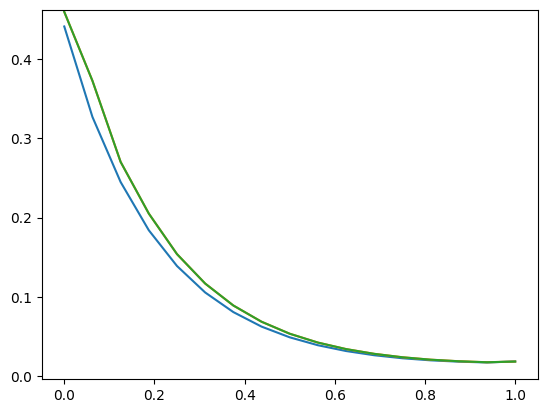

In [7]:
dt = 0.01
#T = 1.0
degree = 1
x = np.linspace(0,1.0,10)
cn = Constant(0.0) #Expression("cos(x)", degree=1)
gamma = Constant(1.0)
ch_constant_16 = adv_diff(16,degree, dt, cn, gamma)
plot(ch_constant_16)
print(ch_constant_16.vector().get_local())

In [8]:
# @title coupler_kdtree.py

import vtk
import meshio

from dolfin import *
from dolfin import sqrt
from vtk.util.numpy_support import vtk_to_numpy
from xii import *
from graphnics import *
from scipy.spatial import cKDTree

def save_mesh_vtk(Lambda, file_path, radius_map_G, uh1d=None):
    """
    Saves a tube mesh as a VThK file with the option to include the 1D solution as a data array.

    Args:
        Lambda (dolfin.Mesh): The mesh to be saved.
        file_path (str): The path where the VTK file will be saved.
        radius_map_G (dolfin.UserExpression): A function to compute radius values at each point.
        uh1d (dolfin.Function, optional): A function representing 1D pressure data.

    Returns:
        None
    """
    points = Lambda.coordinates()
    cells = {"line": Lambda.cells()}

    # Evaluate radius function at each node in the mesh
    radius_values = np.array([radius_map_G(point) for point in points])

    # Evaluate uh1d function at each node in the mesh
    uh1d_values = np.array([uh1d(point) for point in points])

    if uh1d != None:
        mesh = meshio.Mesh(points, cells, point_data={"radius": radius_values, "Pressure1D": uh1d_values})
    else:
        mesh = meshio.Mesh(points, cells, point_data={"radius": radius_values})
    mesh.write(file_path)

    # Convert the mesh to Polydata using VTK
    reader = vtk.vtkUnstructuredGridReader()
    reader.SetFileName(file_path)
    reader.Update()

    # Convert unstructured grid to polydata
    geometryFilter = vtk.vtkGeometryFilter()
    geometryFilter.SetInputData(reader.GetOutput())
    geometryFilter.Update()

    polydata = geometryFilter.GetOutput()

    # Write polydata to a new VTK file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName(file_path)
    writer.SetInputData(polydata)
    writer.Write()

class radius_function(UserExpression):
    """
    A user expression to compute the radius at a given point based on the nearest control point in a graph.

    Args:
        G (graphnics.FenicsGraph): The graph containing control points with radius information.
        mf (dolfin.MeshFunction): A mesh function associated with the graph.
        kdtree (scipy.spatial.cKDTree): A k-d tree for efficient nearest neighbor search in the graph.
        **kwargs: Additional keyword arguments to be passed to the UserExpression constructor.
    """
    def __init__(self, G, mf, kdtree, **kwargs):
        self.G = G
        self.mf = mf
        self.kdtree = kdtree
        super().__init__(**kwargs)

    def eval(self, value, x):
        p = (x[0], x[1], x[2])
        _, nearest_control_point_index = self.kdtree.query(p)
        nearest_control_point = list(self.G.nodes)[nearest_control_point_index]
        value[0] = self.G.nodes[nearest_control_point]['radius']

    def value_shape(self):
        return ()

def run_perfusion_univ(G, directory_path, del_Omega=3.0, perf3=9.6e-2, perf1=1.45e4, kappa=3.09e-5, gamma=1.0, P_infty=1.0e3):
    """
    Runs a perfusion simulation with Robin far field effects everywhere on a given graph, and saves the results for a universal boundary condition.

    Args:
        G (graphnics.FenicsGraph): The graph representing the network.
        directory_path (str): The directory where the results will be saved
        del_Omega (float, optional): Boundary condition value for 3D pressure. Defaults to 3.0
        perf3 (float, optional): 3D perfusion coefficient
        perf1 (float, optional): 1D perfusion coefficient
        kappa (float, optional): Coupling coefficient
        gamma (float, optional): Boundary condition coefficient for 1D pressure
        P_infty (float, optional): Boundary condition value for 1D pressure

    Returns:
        tuple: A tuple containing:
            - output_file_1d (str): The path to the saved 1D pressure VTK file
            - output_file_3d (str): The path to the saved 3D pressure PVD file
            - uh1d (dolfin.Function): The computed 1D pressure function
            - uh3d (dolfin.Function): The computed 3D pressure function
    """
    # Create \Lambda
    G.make_mesh()
    Lambda, mf = G.get_mesh()

    # Reference copy of \Lambda
    H = G.copy()

    # Create \Omega
    Omega = UnitCubeMesh(16, 16, 16)

    # Translate all \Lambda points to positive, same in H
    pos = nx.get_node_attributes(G, "pos")
    node_coords = np.asarray(list(pos.values()))
    xmin, ymin, zmin = np.min(node_coords, axis = 0)
    d = Lambda.coordinates()
    d[:, :] += [-xmin, -ymin, -zmin]
    for node in H.nodes:
        H.nodes[node]['pos'] = np.array(H.nodes[node]['pos']) + [-xmin, -ymin, -zmin]

    # \Lambda k-d tree
    kdtree = cKDTree(np.array(list(nx.get_node_attributes(H, 'pos').values())))

    # Fit \Omega around \Lambda
    c = Omega.coordinates()
    xl, yl, zl = (np.max(node_coords, axis=0)-np.min(node_coords, axis=0))
    c[:,:] *= [xl+3, yl+3, zl]

    def boundary_Omega(x, on_boundary):
        return on_boundary and not near(x[2], 0) and not near(x[2], zl)

    # Constants
    kappa = Constant(kappa)
    gamma = Constant(gamma)
    P_infty = Constant(P_infty)
    del_Omega = Constant(del_Omega)

    # Function spaces
    V3 = FunctionSpace(Omega, "CG", 1)
    V1 = FunctionSpace(Lambda, "CG", 1)
    W = [V3, V1]
    u3, u1 = list(map(TrialFunction, W))
    v3, v1 = list(map(TestFunction, W))

    radius_map_G = radius_function(G, mf, kdtree)
    cylinder = Circle(radius=radius_map_G, degree=5)
   # n = FacetNormal(Lambda)
   # n_normalized = n / sqrt(dot(n, n))

    u3_avg = Average(u3, Lambda, cylinder)#, n=n_normalized)  # Pass n_normalized to Average
    v3_avg = Average(v3, Lambda, cylinder)#, n=n_normalized)

    # Dirac measures
    dxOmega = Measure("dx", domain=Omega)
    dxLambda = Measure("dx", domain=Lambda)
    dsLambda = Measure("ds", domain=Lambda)

    # Define D_area and D_perimeter
    D_area = np.pi * radius_map_G ** 2
    D_perimeter = 2 * np.pi * radius_map_G

    # Blocks
    a00 = perf3 * inner(grad(u3), grad(v3)) * dx + kappa * inner(u3_avg, v3_avg) * D_perimeter * dxLambda
    a01 = -kappa * inner(u1, v3_avg) * D_perimeter * dxLambda
    a10 = -kappa * inner(u3_avg, v1) * D_perimeter * dxLambda
    a11 = perf1 * inner(grad(u1), grad(v1)) * D_area * dxLambda + kappa * inner(u1, v1) * D_perimeter * dxLambda - gamma * inner(u1, v1) * dsLambda

    # Right-hand side
    L0 = inner(Constant(0), v3_avg) * dxLambda
    L1 = -gamma * inner(P_infty, v1) * dsLambda

    a = [[a00, a01], [a10, a11]]
    L = [L0, L1]

    W_bcs = [[DirichletBC(V3, del_Omega, boundary_Omega)], []]

    A, b = map(ii_assemble, (a, L))
    A, b = apply_bc(A, b, W_bcs)
    A, b = map(ii_convert, (A, b))

    wh = ii_Function(W)
    solver = LUSolver(A, "mumps")
    solver.solve(wh.vector(), b)
    uh3d, uh1d = wh
    uh3d.rename("3D Pressure", "3D Pressure Distribution")
    uh1d.rename("1D Pressure", "1D Pressure Distribution")

    # Create output directory if it doesn't exist and save
    os.makedirs(directory_path, exist_ok=True)
    output_file_1d = os.path.join(directory_path, "pressure1d.vtk")
    output_file_3d = os.path.join(directory_path, "pressure3d.pvd")
    save_mesh_vtk(Lambda, output_file_1d, radius_map_G, uh1d=uh1d)
    File(output_file_3d) << uh3d

    return output_file_1d, output_file_3d, uh1d, uh3d, Lambda, Omega


def run_perfusion_univ_time(G, directory_path, del_Omega=3.0, perf3=9.6e-2, perf1=1.45e4, kappa=3.09e-5, gamma=1.0, P_infty=1.0e3, dt=0.1, num_steps=20):
    """
    Runs a time-dependent perfusion simulation using the backward Euler method.

    Args:
        G (graphnics.FenicsGraph): The graph representing the network.
        directory_path (str): The directory where the results will be saved
        del_Omega (float, optional): Boundary condition value for 3D pressure. Defaults to 3.0
        perf3 (float, optional): 3D perfusion coefficient
        perf1 (float, optional): 1D perfusion coefficient
        kappa (float, optional): Coupling coefficient
        gamma (float, optional): Boundary condition coefficient for 1D pressure
        P_infty (float, optional): Boundary condition value for 1D pressure
        dt (float, optional): Time step size
        num_steps (int, optional): Number of time steps to run the simulation

    Returns:
        tuple: A tuple containing:
            - output_file_1d (str): The path to the saved 1D pressure VTK file
            - output_file_3d (str): The path to the saved 3D pressure PVD file
            - uh1d (dolfin.Function): The computed 1D pressure function
            - uh3d (dolfin.Function): The computed 3D pressure function
    """
    # Create \Lambda
    G.make_mesh()
    Lambda, mf = G.get_mesh()

    # Reference copy of \Lambda
    H = G.copy()

    # Create \Omega
    Omega = UnitCubeMesh(32, 32, 32)

    # Translate all \Lambda points to positive, same in H
    pos = nx.get_node_attributes(G, "pos")
    node_coords = np.asarray(list(pos.values()))
    xmin, ymin, zmin = np.min(node_coords, axis = 0)
    d = Lambda.coordinates()
    d[:, :] += [-xmin, -ymin, -zmin]
    for node in H.nodes:
        H.nodes[node]['pos'] = np.array(H.nodes[node]['pos']) + [-xmin, -ymin, -zmin]

    # \Lambda k-d tree
    kdtree = cKDTree(np.array(list(nx.get_node_attributes(H, 'pos').values())))

    # Fit \Omega around \Lambda
    c = Omega.coordinates()
    xl, yl, zl = (np.max(node_coords, axis=0)-np.min(node_coords, axis=0))
    c[:,:] *= [xl+3, yl+3, zl]

    def boundary_Omega(x, on_boundary):
        return on_boundary and not near(x[2], 0) and not near(x[2], zl)

    # Constants
    kappa = Constant(kappa)
    gamma = Constant(gamma)
    P_infty = Constant(P_infty)
    del_Omega = Constant(del_Omega)
    dt = Constant(dt)
    perf3 = Constant(perf3)
    perf1 = Constant(perf1)

    # Function spaces
    V3 = FunctionSpace(Omega, "CG", 1)
    V1 = FunctionSpace(Lambda, "CG", 1)
    W = [V3, V1]
    u3, u1 = list(map(TrialFunction, W))
    v3, v1 = list(map(TestFunction, W))

    _, _, u1_n, u3_n, _, _ = run_perfusion_univ(G, os.path.join(directory_path, "ignore"), del_Omega=3.0, perf3=9.6e-2, perf1=1.45e4, kappa=3.09e-5, gamma=1.0, P_infty=1.0e3)

    radius_map_G = radius_function(G, mf, kdtree)
    cylinder = Circle(radius=radius_map_G, degree=5)

    # Normalize the normal vector before passing it to Average
    # n = FacetNormal(Lambda)
   # n_normalized = n / sqrt(dot(n, n))

    u3_avg = Average(u3, Lambda, cylinder)#, n=n_normalized)  # Pass n_normalized to Average
    v3_avg = Average(v3, Lambda, cylinder)#, n=n_normalized)

    # Dirac measures
    dxOmega = Measure("dx", domain=Omega)
    dxLambda = Measure("dx", domain=Lambda)
    dsLambda = Measure("ds", domain=Lambda)

    # Define D_area and D_perimeter
    D_area = np.pi * radius_map_G ** 2
    D_perimeter = 2 * np.pi * radius_map_G

    # Create output directory if it doesn't exist
    os.makedirs(directory_path, exist_ok=True)
    output_file_1d = os.path.join(directory_path, "pressure1d")
    output_file_3d = os.path.join(directory_path, "pressure3d")

    # Create master .pvd files for animation
    pvd_1d = File(f"{output_file_1d}.pvd")
    pvd_3d = File(f"{output_file_3d}.pvd")

    # Time-stepping
    for n in range(num_steps):
        current_time = n * float(dt)

        # Variational forms
        a00 = (1/dt) * inner(u3, v3) * dxOmega + perf3 * inner(grad(u3), grad(v3)) * dxOmega + kappa * inner(u3_avg, v3_avg) * D_perimeter * dxLambda
        a01 = -kappa * inner(u1, v3_avg) * D_perimeter * dxLambda
        a10 = -kappa * inner(u3_avg, v1) * D_perimeter * dxLambda
        a11 = ch_constant_16

        # Right-hand side
        L0 = (1/dt) * inner(u3_n, v3) * dxOmega + inner(Constant(0), v3_avg) * dxOmega
        L1 = D_area * (1/dt) * inner(u1_n, v1) * dxLambda + inner(Constant(0), v1) * dxLambda - gamma * inner(P_infty, v1) * dsLambda

        a = [[a00, a01], [a10, a11]]
        L = [L0, L1]

        W_bcs = [[DirichletBC(V3, del_Omega, boundary_Omega)], []]

        A, b = map(ii_assemble, (a, L))
        A, b = apply_bc(A, b, W_bcs)
        A, b = map(ii_convert, (A, b))

        wh = ii_Function(W)
        solver = LUSolver(A, "mumps")
        solver.solve(wh.vector(), b)
        uh3d, uh1d = wh
        uh3d.rename("3D Pressure", "3D Pressure Distribution")
        uh1d.rename("1D Pressure", "1D Pressure Distribution")

        # Save to .pvd
        pvd_3d << (uh3d, n)
        pvd_1d << (uh1d, n)

        # Update previous solution
        u3_n.assign(uh3d)
        u1_n.assign(uh1d)

    return f"{output_file_1d}.pvd", f"{output_file_3d}.pvd"


In [9]:
CST_TIME = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=-5))).strftime("%Y-%m-%d_%H-%M")
OUTPUT_PATH = os.path.join(WD_PATH, f'univ_test_{CST_TIME}')

# This will store uh1d, uh3d, Lambda, and Omega in RAM
output_file_1d, output_file_3d, uh1d, uh3d, Lambda, Omega = run_perfusion_univ_time(G, OUTPUT_PATH,
    del_Omega=3.0,
    perf3=9.6e-2,
    perf1=1.45e4,
    kappa=3.09e-5,
    gamma=1.0,
    P_infty=1.0e3
)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_86765630720c088a2ad90ee684d3948b5df76d5b

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00398779 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representat

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_22bb736b850c370ac1741e1a80b6653eae2ad213

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00196433 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00926447 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representat

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_cdd21d347a8b939a40c5cd04a75bdb0e0e4b85cb

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00248075 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.439046 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_7a13db3e62df35cb076482f827a4c3a63ea1ca80

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00420594 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0113008 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:---------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_99e64e64a0b0bf7efa2745c3166b98a12c5ca04c

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0027554 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0115738 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_00b579eba53cd491bc6caf362a7224b14f48f724

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:              '[f_198, f_206]'
  Unique elements:           'DG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'DG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(?,?)>, CG1
                             (?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: au

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_0e559bb996587dc58f3fceedb54558f2cf032454

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00317502 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0134549 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_5e5241c998fccd3b916405f6926290723f6a1ae6

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00317764 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing r

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_aeebad5a973881485d64eebf7ae831081e303822

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00235605 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0125325 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_123a81c0d703674d7b4b696f34ff38a712d2024b

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00311422 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0154784 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_2e0427e90a841c82831c9e8b32364eced707743b

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00365543 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0148203 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_ecb3fd63d7ddd55feb692ec4d0f046834537be75

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00377274 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00850463 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INF

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_51d33c3332188aec72896e97fadde48f6c5bf3c6

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<3 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0280063 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_18ef23f05d0effd386d0c875976458dbea712fa9

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0019424 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0107746 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_e1e8307b7239af85742309df96007de46566bd94

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00201321 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0173509 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_6479fe16a617c3d73e6600e39e9829ec49ac76ab

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.002213 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00941348 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO:

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_eb914eb9d18c377accc78abd23b02e8daf689ae1

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:              '[f_198, f_206]'
  Unique elements:           'DG1(?,?), CG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(
                             ?,?)>'
  Unique sub elements:       'DG1(?,?), CG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(
                             ?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> 

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_d8fc3373dc88dc1d6ff4d4d5e0ad0a0afe52069a

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:              '[f_198, f_206]'
  Unique elements:           'CG1(?,?), DG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(
                             ?,?)>'
  Unique sub elements:       'CG1(?,?), DG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(
                             ?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> 

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_18fd52733fc3061106ecc77d7f38f204fcc8b4e1

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 3
  Number of cell subdomains:           0
  Number of exterior_facet subdomains: 0
  Rank:                                2
  Arguments:                           '(v_0, v_1)'
  Number of coefficients:              3
  Coefficients:                        '[f_198, f_199, f_206]'
  Unique elements:                     'CG1(?,?), R0(?,?), CG2(?,?), Vector<3 x CG1(
                                       ?,?)>'
  Unique sub elements:       

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_b9eedb18ffba88a4370699160552c2d91a80e1e5

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_207]'
  Unique elements:           'DG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'DG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 1
INFO:FFC:  quadrature_degree: 1
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0152311 seconds.

INFO:FFC:Comp

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_91c4ca8edfb2c3798a68e4b81a9d3b6d0918e144

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:UFL_LEGACY:Adjusting missing element cell to interval3D.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 3
  Number of exterior_facet subdomains: 0
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              2
  Coefficients:                        '[f_199, f_200]'
  Unique elements:                     'CG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:                 'CG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadra

Calling FFC just-in-time (JIT) compiler, this may take some time.



Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_8bd750f9131ecfcc46399fad8bd892e68b71ac70

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    1
  Coefficients:              '[f_156]'
  Unique elements:           'CG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0182788 seconds.

INFO:FFC:Compile

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_89024ca3e04ccffeb95c1589e5b2b8d31d162db6

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00201678 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.00787711 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representat

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_168a6722b3e7decf2e6398731db591b81c053fa6

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    1
  Coefficients:              '[f_157]'
  Unique elements:           'CG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), R0(?,?), Vector<3 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 0
INFO:FFC:  quadrature_degree: 0
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.034142 seconds.

INFO:FFC:Compiler 

NotImplementedError: Cannot take length of non-vector expression.

In [ ]:
# @title visualizer.py
import matplotlib
import matplotlib.pyplot as plt
import numpy
import plotly
import scipy
import plotly.graph_objects as go
import numpy as np
import scipy.interpolate

def visualize(mesh1d, uh1d, mesh3d=None, uh3d=None, z_level=50, elev=10, azim=30, boundary_list=None):
    node_coords = mesh1d.coordinates()
    pressure_values = uh1d.compute_vertex_values(mesh1d)

    x_min, x_max = node_coords[:, 0].min(), node_coords[:, 0].max()
    y_min, y_max = node_coords[:, 1].min(), node_coords[:, 1].max()
    x_width, y_width = x_max - x_min, y_max - y_min

    num_columns = 2 if (uh3d is not None and mesh3d is not None) else 1
    fig, ax1 = plt.subplots(1, num_columns, figsize=(20, 8) if num_columns == 2 else (10, 8))
    ax1 = fig.add_subplot(121, projection='3d')

    if num_columns == 2:
        pressure_3d_values = uh3d.compute_vertex_values(mesh3d)
        coords_3d = mesh3d.coordinates()

        z_coords = coords_3d[:, 2]
        mask = np.isclose(z_coords, z_level, atol=mesh3d.hmin())
        filtered_coords = coords_3d[mask]
        filtered_pressure = pressure_3d_values[mask]

        # grid for the heatmap
        x = filtered_coords[:, 0]
        y = filtered_coords[:, 1]
        z = filtered_pressure
        grid_size = 200
        xi = np.linspace(x.min(), x.max(), grid_size)
        yi = np.linspace(y.min(), y.max(), grid_size)
        zi = scipy.interpolate.griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

        fig.get_axes()[0].axis('off')
        fig.get_axes()[1].axis('off')
    else:
        fig.get_axes()[0].axis('off')

    # (1D) 2D plane at Z = z_level
    x_plane, y_plane = np.meshgrid(
        np.linspace(x_min, x_max, num=10),
        np.linspace(y_min, y_max, num=10)
    )
    z_plane = np.full(x_plane.shape, z_level)

    ax1.plot_surface(x_plane, y_plane, z_plane, color='m', alpha=0.3, zorder=10) # ensure plane is in front
    ax1.view_init(elev=elev, azim=azim)
    sc = ax1.scatter(node_coords[:, 0], node_coords[:, 1], node_coords[:, 2], c=pressure_values, cmap='viridis', s=0.1)
    cbar = plt.colorbar(sc, ax=ax1)
    cbar.set_label('1D Pressure')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('1D Domain')

    if boundary_list is not None:
        for point in boundary_list:
            ax1.scatter(*point, color='red')

    # (3D) 2D heatmap subplot
    if num_columns == 2:
        ax2 = fig.add_subplot(122)
        cf = ax2.contourf(xi, yi, zi, levels=100, cmap='viridis')
        cbar = plt.colorbar(cf, ax=ax2)
        cbar.set_label('Pressure')
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.set_title(f'3D Domain Section at Z = {z_level}')

    plt.gca().set_aspect('equal')
    plt.show()

def visualize_scatter(mesh1d, uh1d, z_level=50, boundary_list=None):
    node_coords = mesh1d.coordinates()
    pressure_values = uh1d.compute_vertex_values(mesh1d)

    fig = go.Figure()

    fig.add_trace(go.Scatter3d(x=node_coords[:, 0], y=node_coords[:, 1], z=node_coords[:, 2],
                              mode='markers',
                              marker=dict(size=2, color=pressure_values, colorscale='Viridis', colorbar=dict(title='1D Pressure')), hovertext=[f"Pressure: {val:.4f}" for val in pressure_values],
                              name=''))

    # Plane at Z = z_level
    x_min, x_max, y_min, y_max = node_coords[:, 0].min(), node_coords[:, 0].max(), node_coords[:, 1].min(), node_coords[:, 1].max()
    x_plane, y_plane = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
    z_plane = z_level * np.ones_like(x_plane)

    fig.add_trace(go.Surface(x=x_plane, y=y_plane, z=z_plane, opacity=0.3, name=f'Plane at Z={z_level}'))

    # Boundary points
    if boundary_list:
        fig.add_traces([go.Scatter3d(x=[p[0]], y=[p[1]], z=[p[2]], showlegend = False, mode='markers', marker=dict(size=5, color='red')) for p in boundary_list])

    # Set camera view
    fig.update_layout(
        scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=-1.25, y=-1.25, z=1.25)),
        scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
        width=1000, height=800
    )

    fig.show()

def visualize_contour(mesh3d, uh3d, z_level=50):
    if uh3d is not None and mesh3d is not None:
        pressure_3d_values = uh3d.compute_vertex_values(mesh3d)
        coords_3d = mesh3d.coordinates()

        z_coords = coords_3d[:, 2]
        mask = np.isclose(z_coords, z_level, atol=mesh3d.hmin())
        filtered_coords = coords_3d[mask]
        filtered_pressure = pressure_3d_values[mask]

        x = filtered_coords[:, 0]
        y = filtered_coords[:, 1]
        z = filtered_pressure
        grid_size = 200
        xi = np.linspace(x.min(), x.max(), grid_size)
        yi = np.linspace(y.min(), y.max(), grid_size)
        zi = scipy.interpolate.griddata((x, y), z, (xi[None, :], yi[:, None]), method='linear')

        fig = go.Figure()
        fig.add_trace(go.Contour(
            z=zi,
            x=xi,
            y=yi,
            colorscale='Viridis',
            colorbar=dict(title='Pressure'),
            name=f'3D Domain Section at Z = {z_level}'
        ))

        fig.update_layout(
            xaxis = dict(title='X'),
            yaxis = dict(title='Y', scaleanchor="x", scaleratio=1),
            width=800,
            height=800
        )

        fig.show()

In [ ]:
visualize_scatter(Lambda, uh1d)

NameError: name 'Lambda' is not defined